In [6]:
# Priting over 1 line of code within the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# LIBRARIES

# Must
import os
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Soup
from bs4 import BeautifulSoup

# REGEX
#import re

# Math
#import math
#from scipy import stats
#from scipy.stats import shapiro
#import scipy.stats as st

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPRegressor
#from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

# Extra
import warnings
warnings.filterwarnings('ignore')
#import pickle
import timeit
import statsmodels.api as sm
import scipy.stats as st

In [8]:
data= pd.read_csv('sales1.csv')

In [9]:
data.head()
len(data)

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


640840

### Columns description
- shop_ID : Shop's unique identifier. __object__
- day_of_the_week : Encoded from 0 to 6. __object__
- date : day, month and year of the data point. __datetime__
- number of customers : Quantity of customers that showed up that day. __int__
- open : Binary variable equal to 0 if shop closed that day and 1 if shop open. __object__
- promotion : Binary variable equal to 0 if shop had no promotions that day and 1 if it did. __object__
- state_holiday : Encoded 0, a, b, c indicating if there was a state holiday at all (0 if not), and otherwise, the number indicates which state holiday it was. __object__
- school_holiday : Binary variable equal to 0 if there was a school holiday that day and 1 if not __object__
</br>


- sales: TARGET

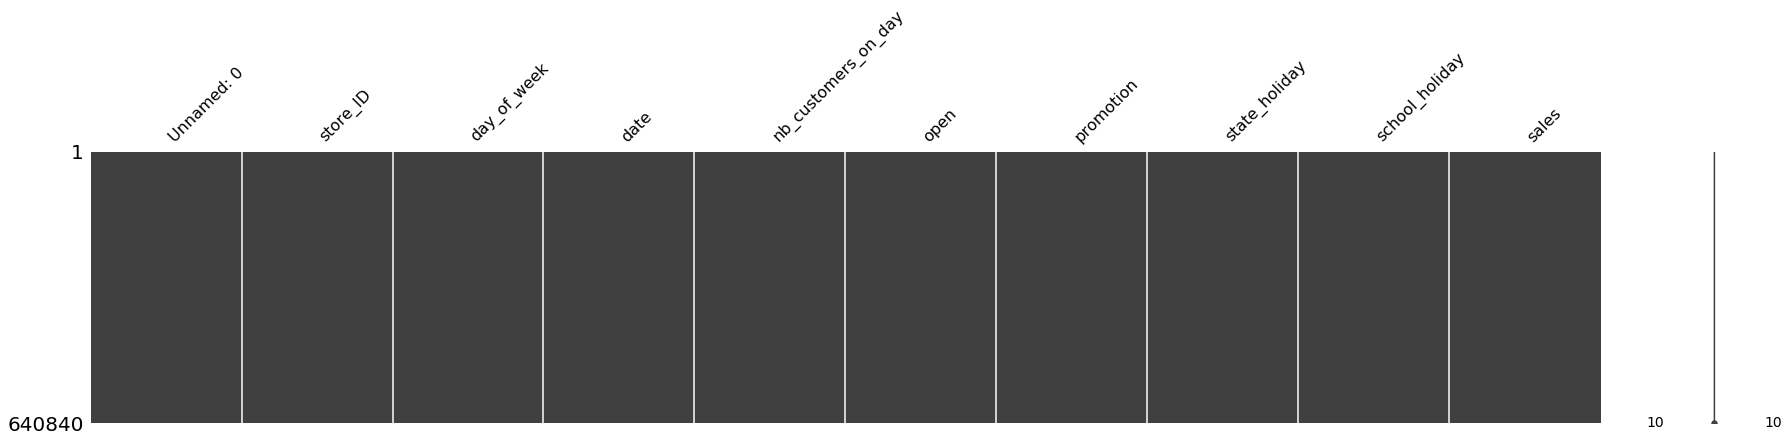

In [10]:
# Checking missing data

missingno.matrix(data, figsize = (30,5))

In [11]:
data.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [12]:
data.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [13]:
# Renaming columns

data.rename(columns = {'Unnamed: 0':'index'}, inplace = True)

In [14]:
#data['index'] = data['index'].astype('object')
data['store_ID'] = data['store_ID'].astype('object')
data['day_of_week'] = data['day_of_week'].astype('object')
data['open'] = data['open'].astype('object')
data['promotion'] = data['promotion'].astype('object')
data['school_holiday'] = data['school_holiday'].astype('object')
data['date']= pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
index                  640840 non-null int64
store_ID               640840 non-null object
day_of_week            640840 non-null object
date                   640840 non-null datetime64[ns]
nb_customers_on_day    640840 non-null int64
open                   640840 non-null object
promotion              640840 non-null object
state_holiday          640840 non-null object
school_holiday         640840 non-null object
sales                  640840 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 48.9+ MB


In [15]:
# linear regression dont work on datetime it needs to be converted to datetime

data['date']=data['date'].map(dt.datetime.toordinal)

In [16]:
# closed or open

data.open.value_counts()

1    532016
0    108824
Name: open, dtype: int64

In [17]:
data_open = data[data['open'] == 1]
data_open = data[data['day_of_week']!= 7]
data_open = data[data['nb_customers_on_day']!= 0]

In [18]:
data.dtypes
data_open.dtypes

index                   int64
store_ID               object
day_of_week            object
date                    int64
nb_customers_on_day     int64
open                   object
promotion              object
state_holiday          object
school_holiday         object
sales                   int64
dtype: object

index                   int64
store_ID               object
day_of_week            object
date                    int64
nb_customers_on_day     int64
open                   object
promotion              object
state_holiday          object
school_holiday         object
sales                   int64
dtype: object

In [19]:
data_close = pd.merge(data, data_open, how='outer', indicator=True)
data_close.head()
#data[data.sales.isin(data_open.sales)]
#(USERS.email.isin(EXCLUDE.email))
#(~USERS.email.isin(EXCLUDE.email))
#print (USERS[~USERS.email.isin(EXCLUDE.email)])

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,_merge
0,425390,366,4,734976,517,1,0,0,0,4422,both
1,291687,394,6,735699,694,1,0,0,0,8297,both
2,411278,807,4,735109,970,1,1,0,0,9729,both
3,664714,802,2,735016,473,1,1,0,0,6513,both
4,540835,726,4,735151,1068,1,1,0,0,10882,both


In [20]:
data_close._merge.value_counts()

both          531986
left_only     108854
right_only         0
Name: _merge, dtype: int64

In [21]:
data_close= data_close.loc[data_close._merge == 'left_only']

In [22]:
len(data)
len(data_open)
len(data_close)

len(data_close)+len(data_open)==len(data)

640840

531986

108854

True

In [23]:
data_open.head()
data_open.info()
data_open['day_of_week'].value_counts()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,734976,517,1,0,0,0,4422
1,291687,394,6,735699,694,1,0,0,0,8297
2,411278,807,4,735109,970,1,1,0,0,9729
3,664714,802,2,735016,473,1,1,0,0,6513
4,540835,726,4,735151,1068,1,1,0,0,10882


<class 'pandas.core.frame.DataFrame'>
Int64Index: 531986 entries, 0 to 640838
Data columns (total 10 columns):
index                  531986 non-null int64
store_ID               531986 non-null object
day_of_week            531986 non-null object
date                   531986 non-null int64
nb_customers_on_day    531986 non-null int64
open                   531986 non-null object
promotion              531986 non-null object
state_holiday          531986 non-null object
school_holiday         531986 non-null object
sales                  531986 non-null int64
dtypes: int64(4), object(6)
memory usage: 44.6+ MB


6    90898
2    90595
3    89272
5    87574
1    86454
4    84880
7     2313
Name: day_of_week, dtype: int64

In [24]:
# Running models with raw data

X= data_open.drop(columns= ['sales', 'open', 'store_ID', 'index'])
y= data_open['sales']

In [25]:
X
y

,day_of_week,date,nb_customers_on_day,promotion,state_holiday,school_holiday
0,4,734976,517,0,0,0
1,6,735699,694,0,0,0
2,4,735109,970,1,0,0
3,2,735016,473,1,0,0
4,4,735151,1068,1,0,0
...,...,...,...,...,...,...
640833,6,735615,701,0,0,0
640835,6,735167,483,0,0,0
640836,1,735337,987,1,0,0
640837,1,735421,925,0,0,0


0          4422
1          8297
2          9729
3          6513
4         10882
          ...  
640833     8219
640835     4553
640836    12307
640837     6800
640838     5344
Name: sales, Length: 531986, dtype: int64

In [26]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# standard scaler

transformer = StandardScaler().fit(numericalX)
num_standardized = transformer.transform(numericalX)
X_scaled = pd.DataFrame(num_standardized)


# hot encoding categoricals

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([X_scaled, encoded_categorical], axis = 1)

In [27]:
y.head()

0     4422
1     8297
2     9729
3     6513
4    10882
Name: sales, dtype: int64

In [28]:
X.head()

,0,1,0,1,2,3,4,5,6,7,8,9,10
0,-1.304659,-0.613924,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.329581,-0.172204,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.820075,0.516579,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.158920,-0.723730,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.667049,0.761147,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
# focus on the gboost
GB = GradientBoostingRegressor()

GB.fit(X_train,y_train)

#X_train.shape
#y_test.shape

#plt.scatter(X_train, y_test)
#plt.plot(X_train, GB.predict(X_train))
#plt.show()

GB.score(X_test,y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

0.7724193053684063

In [31]:
pred= GB.predict(X)
pred

array([4637.87003101, 6467.29293066, 8592.36416163, ..., 9828.92650366,
       7664.0786277 , 6032.90868759])

In [ ]:
len(pred)

In [ ]:
data_open['pred']= pred

In [ ]:
final_data_pred= pd.concat([data_open, data_close], axis= 0)

In [ ]:
final_data_pred.drop(columns= '_merge', inplace= True)

In [ ]:
final_data_pred['pred'].fillna(0, inplace= True)

In [ ]:
final_data_pred.head()
final_data_pred['index'].max()

In [149]:
val= pd.read_csv('validation_for_students.csv')

In [150]:
len(val)

71205

In [151]:
val.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [152]:
data_open.dtypes

index                    int64
store_ID                object
day_of_week             object
date                     int64
nb_customers_on_day      int64
open                    object
promotion               object
state_holiday           object
school_holiday          object
sales                    int64
pred                   float64
dtype: object

In [153]:
val.dtypes

index                   int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
dtype: object

In [154]:
#data['index'] = data['index'].astype('object')
val['store_ID'] = val['store_ID'].astype('object')
val['day_of_week'] = val['day_of_week'].astype('object')
val['open'] = val['open'].astype('object')
val['promotion'] = val['promotion'].astype('object')
val['school_holiday'] = val['school_holiday'].astype('object')
val['date']= pd.to_datetime(val['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
index                  640840 non-null int64
store_ID               640840 non-null object
day_of_week            640840 non-null object
date                   640840 non-null int64
nb_customers_on_day    640840 non-null int64
open                   640840 non-null object
promotion              640840 non-null object
state_holiday          640840 non-null object
school_holiday         640840 non-null object
sales                  640840 non-null int64
dtypes: int64(4), object(6)
memory usage: 48.9+ MB


In [155]:
val['date']= pd.to_datetime(val['date'])
val['date']=val['date'].map(dt.datetime.toordinal)

In [156]:
val_1= val.drop(columns= ['open', 'store_ID', 'index'])

In [157]:
numerical_val = val_1.select_dtypes(np.number)
categorical_val = val_1.select_dtypes(np.object)

# standard scaler

transformer = StandardScaler().fit(numerical_val)
num_standardized = transformer.transform(numerical_val)
val_scaled = pd.DataFrame(num_standardized)


# hot encoding categoricals

encoder = OneHotEncoder(drop='first').fit(categorical_val)
encoded_categorical = encoder.transform(categorical_val).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
val_trans = pd.concat([val_scaled, encoded_categorical], axis = 1)

In [160]:
pred_val= GB.predict(val_trans)

In [161]:
val['sales']= pred_val

In [163]:
val[['index', 'sales']]

,index,sales
0,272371,2246.832865
1,558468,1825.545356
2,76950,7797.200236
3,77556,7402.014724
4,456344,7409.141962
...,...,...
71200,59062,1550.078367
71201,687449,1402.332893
71202,207393,6293.766300
71203,233378,7689.582844


In [142]:
len(final)

531986

In [144]:
len(data)

640840

In [166]:
final.to_csv('predictions.csv')

In [164]:
final.to_csv('sales')

In [161]:
data.head()
final.head()
val.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


,index,pred
0,425390,4771.878561
1,291687,6312.046434
2,411278,8847.058853
3,664714,5606.649664
4,540835,9535.490149


,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,2015-01-03,0,0,0,0,0
1,558468,27,7,2013-12-29,0,0,0,0,0
2,76950,404,3,2014-03-19,657,1,1,0,0
3,77556,683,2,2013-01-29,862,1,0,0,0
4,456344,920,3,2014-03-19,591,1,1,0,0


In [153]:
data['index'] = data['index'].astype('int')
final['index'] = final['index'].astype('int')

ValueError: setting an array element with a sequence.

In [163]:
len(final)
len(val)

531986

71205

In [91]:
#data['index'] = data['index'].astype('object')
val['store_ID'] = val['store_ID'].astype('object')
val['day_of_week'] = val['day_of_week'].astype('object')
val['open'] = val['open'].astype('object')
val['promotion'] = val['promotion'].astype('object')
val['school_holiday'] = val['school_holiday'].astype('object')
val['date']= pd.to_datetime(val['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
index                  640840 non-null int64
store_ID               640840 non-null object
day_of_week            640840 non-null object
date                   640840 non-null datetime64[ns]
nb_customers_on_day    640840 non-null int64
open                   640840 non-null object
promotion              640840 non-null object
state_holiday          640840 non-null object
school_holiday         640840 non-null object
sales                  640840 non-null int64
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 48.9+ MB


In [ ]:
data_open = data[data['open'] == 1]
data_open = data[data['day_of_week']!= 7]
data_open = data[data['nb_customers_on_day']!= 0]

In [134]:
val.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,2015-01-03,0,0,0,0,0
1,558468,27,7,2013-12-29,0,0,0,0,0
2,76950,404,3,2014-03-19,657,1,1,0,0
3,77556,683,2,2013-01-29,862,1,0,0,0
4,456344,920,3,2014-03-19,591,1,1,0,0


In [135]:
final.head()

,index,pred
0,425390,4771.878561
1,291687,6312.046434
2,411278,8847.058853
3,664714,5606.649664
4,540835,9535.490149


In [136]:
inner = pd.merge(val, final, on='index')

In [137]:
inner

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,pred


In [140]:
left_merged = pd.merge(val, final,
                        how="left", on= 'index')

In [141]:
left_merged.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,pred
0,272371,415,7,2015-01-03,0,0,0,0,0,NaN
1,558468,27,7,2013-12-29,0,0,0,0,0,NaN
2,76950,404,3,2014-03-19,657,1,1,0,0,NaN
3,77556,683,2,2013-01-29,862,1,0,0,0,NaN
4,456344,920,3,2014-03-19,591,1,1,0,0,NaN


In [ ]:
left_merged

In [119]:
data_4 = pd.read_csv('validation_for_students.csv')
data_5= pd.read_csv('sales.csv')






X = data_4['nb_customers_on_day']
y = data_5['sales']

In [120]:
pred= GB.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   0. 657. ... 648. 626. 828.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
data_open.head()